Project: Exploring data about Hertforshire (England)

In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

In [2]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

Getting table with names of Hertfordshire cities from wikipedia into dataframe

In [3]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_settlements_in_Hertfordshire_by_population")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 

df_list = pd.read_html(str(table))
df=pd.DataFrame(df_list[0])

In [4]:
df.dtypes

#                       float64
Settlement               object
District                 object
Population (2001)         int64
Population (2011)[1]     object
dtype: object

Deleting columns, that we are not going to use, and change of names of 2 columns

In [5]:
df.drop(['#'],axis=1,inplace=True)
df.drop(['District'],axis=1,inplace=True)
df.drop(['Population (2011)[1]'],axis=1,inplace=True)
df.rename(columns={"Settlement":"City","Population (2001)":"Population"},inplace=True)

Changing one place's colloborate name to single name and adding a column with longer city's name other way location could not be found

In [6]:
df.loc[df["City"] == "Eastbury/Moor Park/Northwood", "City"] = "Eastbury"

df['City long']=df['City']+', Hertfordshire, East of England, England'

Add coordinates of cities to the dataframe

In [12]:
df["Latitude"]=1
df["Longitude"]=1

for address in df["City long"]:
    print(address)
    geolocator = Nominatim(user_agent="t_explorer")
    location = geolocator.geocode(address)
    #print(location)
    if location is not None:
        df.loc[df["City long"] == address, "Latitude"] = location.latitude
        df.loc[df["City long"] == address, "Longitude"] = location.longitude
        print('The geograpical coordinate  are {}, {}.'.format(location.latitude, location.longitude))
 

Watford, Hertfordshire, East of England, England
The geograpical coordinate  are 51.6553875, -0.3957425.
Hemel Hempstead, Hertfordshire, East of England, England
The geograpical coordinate  are 51.7511784, -0.472528.
Stevenage, Hertfordshire, East of England, England
The geograpical coordinate  are 51.9035099, -0.2013368.
St Albans, Hertfordshire, East of England, England
The geograpical coordinate  are 51.7492956, -0.3422526.
Welwyn Garden City, Hertfordshire, East of England, England
The geograpical coordinate  are 51.8031083, -0.2068872.
Cheshunt, Hertfordshire, East of England, England
The geograpical coordinate  are 51.702052, -0.0335908.
Hoddesdon, Hertfordshire, East of England, England
The geograpical coordinate  are 51.7616709, -0.0112898.
Bishop's Stortford, Hertfordshire, East of England, England
The geograpical coordinate  are 51.8676279, 0.1631961.
Hatfield, Hertfordshire, East of England, England
The geograpical coordinate  are 51.7634675, -0.2258741.
Borehamwood, Hertfor

In [13]:
df

,City,Population,City long,Latitude,Longitude
0,Watford,90301,"Watford, Hertfordshire, East of England, England",51.655388,-0.395742
1,Hemel Hempstead,82074,"Hemel Hempstead, Hertfordshire, East of Englan...",51.751178,-0.472528
2,Stevenage,80973,"Stevenage, Hertfordshire, East of England, Eng...",51.903510,-0.201337
3,St Albans,64038,"St Albans, Hertfordshire, East of England, Eng...",51.749296,-0.342253
4,Welwyn Garden City,43252,"Welwyn Garden City, Hertfordshire, East of Eng...",51.803108,-0.206887
5,Cheshunt,38726,"Cheshunt, Hertfordshire, East of England, England",51.702052,-0.033591
6,Hoddesdon,20250,"Hoddesdon, Hertfordshire, East of England, Eng...",51.761671,-0.011290
7,Bishop's Stortford,34929,"Bishop's Stortford, Hertfordshire, East of Eng...",51.867628,0.163196
8,Hatfield,27883,"Hatfield, Hertfordshire, East of England, England",51.763467,-0.225874
9,Borehamwood,31616,"Borehamwood, Hertfordshire, East of England, E...",51.660486,-0.270651


Save dataframe in csv file, so next time we could use saved data directly from there

In [13]:
df.to_csv(r'coord.csv')

Reading csv file into dataframe

In [15]:
filename="coord.csv"
df=pd.read_csv(filename)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
#df

In [14]:
df.shape

(37, 5)

Creating map of Hetorshire

In [15]:
address = 'Hertford'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hertford are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hertford are 51.7957409, -0.078521.


In [16]:
map_h = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, population in zip(df['Latitude'], df['Longitude'], df['City'], df['Population']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    if population>20000 :
        c='red'
        r=7
    else:
        c='blue'
        r=5
    folium.CircleMarker(
        [lat, lng],
        radius=r,
        popup=label,
        color=c,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_h)  
    
map_h

In [17]:
CLIENT_ID = 'F3J2SG0IXGEASEW51USPDY3HFT2BNJME0OMQMFITJC3VZWM5' 
CLIENT_SECRET = 'ESSJL0JBZ2ACJH2VBPMBJHOKFXP5OT5I3B13ZVWF4UXQTFNS' 
VERSION = '20190802' # Foursquare API version

The 1st city

In [18]:
city_latitude = df.loc[0, 'Latitude'] 
city_longitude = df.loc[0, 'Longitude'] 

city_name = df.loc[0, 'City'] 

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Watford are 51.6553875, -0.3957425.


In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(    
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=F3J2SG0IXGEASEW51USPDY3HFT2BNJME0OMQMFITJC3VZWM5&client_secret=ESSJL0JBZ2ACJH2VBPMBJHOKFXP5OT5I3B13ZVWF4UXQTFNS&v=20190802&ll=51.6553875,-0.3957425&radius=500&limit=100'

Getting 100 venues (or less if there are no 100) in radiuss 500m from city centre

In [20]:
import json # library to handle JSON files
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d48a12500bad70025cefda1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Watford',
  'headerFullLocation': 'Watford',
  'headerLocationGranularity': 'city',
  'totalResults': 42,
  'suggestedBounds': {'ne': {'lat': 51.659887504500006,
    'lng': -0.38850253286061304},
   'sw': {'lat': 51.6508874955, 'lng': -0.40298246713938696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5486ef97498e40c7e258bf90',
       'name': 'Gourmet Burger Kitchen',
       'location': {'address': 'Unit 177A, Intu Watford Shopping Centre',
        'crossStreet': 'Upper Mall',
        'lat': 51.65410680531244,
        'lng': -0.39382524762167476,
        'labeledLatL

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Gourmet Burger Kitchen,Burger Joint,51.654107,-0.393825
1,wagamama,Asian Restaurant,51.653903,-0.394193
2,Five Guys,Burger Joint,51.656066,-0.397243
3,Ocean Bells Coffee Company,Coffee Shop,51.653907,-0.393360
4,John Lewis & Partners,Department Store,51.654633,-0.392154


How many verues were found in Watford  (radiuss from centre =500)

In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

42 venues were returned by Foursquare.


We have found only 42 venues the a city with biggest population, so let's increase radiuss to 1000m to find more and get more representative data

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(        
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    #print(venues_list)
    return(nearby_venues)

In [25]:
t_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [26]:
print(t_venues.shape)
t_venues

(936, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Watford,51.655388,-0.395742,Gourmet Burger Kitchen,51.654107,-0.393825,Burger Joint
1,Watford,51.655388,-0.395742,wagamama,51.653903,-0.394193,Asian Restaurant
2,Watford,51.655388,-0.395742,Ocean Bells Coffee Company,51.653907,-0.393360,Coffee Shop
3,Watford,51.655388,-0.395742,Five Guys,51.656066,-0.397243,Burger Joint
4,Watford,51.655388,-0.395742,John Lewis & Partners,51.654633,-0.392154,Department Store
5,Watford,51.655388,-0.395742,Watford Palace Theatre,51.657205,-0.397190,Theater
6,Watford,51.655388,-0.395742,Nando's,51.657508,-0.399254,Portuguese Restaurant
7,Watford,51.655388,-0.395742,The Place To Eat,51.654689,-0.391672,Restaurant
8,Watford,51.655388,-0.395742,Meat & Shake,51.654047,-0.393772,Burger Joint
9,Watford,51.655388,-0.395742,Pret A Manger,51.656832,-0.397862,Sandwich Place


In [27]:
t_venues.groupby('City').count().sort_values(['City Latitude'],ascending=False)

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Watford,95,95,95,95,95,95
St Albans,88,88,88,88,88,88
Hemel Hempstead,45,45,45,45,45,45
Borehamwood,43,43,43,43,43,43
Hitchin,42,42,42,42,42,42
Bishop's Stortford,41,41,41,41,41,41
Berkhamsted,40,40,40,40,40,40
Hatfield,40,40,40,40,40,40
Rickmansworth,37,37,37,37,37,37


Can see that increasinf radiuss gives us twice more venues for Watford

In [28]:
print('There are {} uniques categories.'.format(len(t_venues['Venue Category'].unique())))

There are 152 uniques categories.


Analyze Each City

In [29]:
# one hot encoding
t_onehot = pd.get_dummies(t_venues[['Venue Category']], prefix="", prefix_sep="")

t_onehot['City'] = t_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]

t_onehot.head(50)

,City,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bakery,Bar,...,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Warehouse Store,Wine Bar,Wine Shop,Women's Store
0,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Watford,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Watford,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Watford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
t_onehot.shape

(936, 153)

In [31]:
t_grouped = t_onehot.groupby('City').sum().reset_index()
#t_grouped = t_onehot.groupby('City').mean().reset_index()
t_grouped

,City,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bakery,Bar,...,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Warehouse Store,Wine Bar,Wine Shop,Women's Store
0,Abbots Langley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Baldock,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Berkhamsted,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Bishop's Stortford,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,1,1,0,0,0
4,Borehamwood,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,1,0,0,0
5,Bovingdon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Broxbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Buntingford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Bushey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Cheshunt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
t_grouped.shape

(37, 153)

Let's take a look to each city along with its the top 10 most popular venues

In [33]:
num_top_venues = 10

for hood in t_grouped['City']:
    print("----"+hood+"----")
    temp = t_grouped[t_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbots Langley----
                venue  freq
0                 Pub   3.0
1   Convenience Store   1.0
2  Chinese Restaurant   1.0
3                Café   1.0
4   Indian Restaurant   1.0
5                Pool   0.0
6                Park   0.0
7     Nature Preserve   0.0
8           Nightclub   0.0
9        Noodle House   0.0


----Baldock----
                  venue  freq
0                   Pub   3.0
1     Indian Restaurant   2.0
2           Coffee Shop   2.0
3          Soccer Field   1.0
4         Garden Center   1.0
5                  Café   1.0
6  Fast Food Restaurant   1.0
7         Train Station   1.0
8                 Hotel   1.0
9       Fireworks Store   1.0


----Berkhamsted----
                venue  freq
0                 Pub   5.0
1                Café   4.0
2         Pizza Place   3.0
3       Grocery Store   3.0
4  Italian Restaurant   3.0
5         Coffee Shop   2.0
6   French Restaurant   2.0
7           Bookstore   2.0
8             Brewery   2.0
9            Pharma

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = t_grouped['City']

for ind in np.arange(t_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(t_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbots Langley,Pub,Indian Restaurant,Café,Convenience Store,Chinese Restaurant,Film Studio,French Restaurant,Food Stand,Food & Drink Shop,Fish & Chips Shop
1,Baldock,Pub,Indian Restaurant,Coffee Shop,Supermarket,Gastropub,Garden Center,Fish & Chips Shop,Fireworks Store,Fast Food Restaurant,Park
2,Berkhamsted,Pub,Café,Grocery Store,Pizza Place,Italian Restaurant,Coffee Shop,French Restaurant,Brewery,Bookstore,Indian Restaurant
3,Bishop's Stortford,Pub,Italian Restaurant,Supermarket,Coffee Shop,Clothing Store,Restaurant,Pizza Place,Bar,French Restaurant,Café
4,Borehamwood,Coffee Shop,Gym / Fitness Center,Hotel,Film Studio,Grocery Store,Fast Food Restaurant,Bakery,Pizza Place,Supermarket,Indian Restaurant
5,Bovingdon,Indian Restaurant,Racetrack,Market,Grocery Store,Film Studio,French Restaurant,Food Stand,Food & Drink Shop,Fish & Chips Shop,Fireworks Store
6,Broxbourne,Pub,Park,Gas Station,Train Station,Harbor / Marina,Restaurant,Grocery Store,Women's Store,Event Space,Food & Drink Shop
7,Buntingford,Grocery Store,Gas Station,Motorcycle Shop,Food Stand,Garden Center,Fried Chicken Joint,French Restaurant,Food & Drink Shop,Fish & Chips Shop,Fireworks Store
8,Bushey,Pub,Restaurant,English Restaurant,Grocery Store,Italian Restaurant,Golf Course,Park,Food & Drink Shop,Fish & Chips Shop,Fireworks Store
9,Cheshunt,Grocery Store,Pub,Café,Burger Joint,Recreation Center,Breakfast Spot,College Theater,River,Convenience Store,Hostel


Let's take a look what top 3 popular other city places each particular city does not have in 1000m radiuss around the center inside its 10 most popular

In [36]:
L_top10=[]
for j in range (0,cities_venues_sorted.shape[0]):
    L=[]
    for i in range (1,11):
        L.append(cities_venues_sorted.iloc[j][i])
    #print("Top 10 in ",cities_venues_sorted.iloc[j][0]," ",L,"\n")
    L_top10.append(L)

L_new_all=[]    
for z in range (0,cities_venues_sorted.shape[0]):    
    L_new=[]
    for j in range (0,cities_venues_sorted.shape[0]):
        for i in range (1,3):
            if (cities_venues_sorted.iloc[j][i] not in L_top10[z]) and (cities_venues_sorted.iloc[j][i] not in L_new):
                L_new.append(cities_venues_sorted.iloc[j][i])
    L_new_all.append(L_new)
    print("Top 10 in ",cities_venues_sorted.iloc[z][0]," ",L_top10[z],"\n")
    print("Top 3 in other cities, what is not popular in ",cities_venues_sorted.iloc[z][0]," ",L_new,"\n")

Top 10 in  Abbots Langley   ['Pub', 'Indian Restaurant', 'Café', 'Convenience Store', 'Chinese Restaurant', 'Film Studio', 'French Restaurant', 'Food Stand', 'Food & Drink Shop', 'Fish & Chips Shop'] 

Top 3 in other cities, what is not popular in  Abbots Langley   ['Italian Restaurant', 'Coffee Shop', 'Gym / Fitness Center', 'Racetrack', 'Park', 'Grocery Store', 'Gas Station', 'Restaurant', 'Furniture / Home Store', 'Fast Food Restaurant', 'Clothing Store', 'Sandwich Place', 'Supermarket', 'Train Station', 'Pizza Place', 'Deli / Bodega', 'Hotel', 'Pool', 'Platform'] 

Top 10 in  Baldock   ['Pub', 'Indian Restaurant', 'Coffee Shop', 'Supermarket', 'Gastropub', 'Garden Center', 'Fish & Chips Shop', 'Fireworks Store', 'Fast Food Restaurant', 'Park'] 

Top 3 in other cities, what is not popular in  Baldock   ['Café', 'Italian Restaurant', 'Gym / Fitness Center', 'Racetrack', 'Grocery Store', 'Gas Station', 'Restaurant', 'Convenience Store', 'Furniture / Home Store', 'Clothing Store', 'San

Cities where Italian Restaurant or at least Pizza place are not in top 10 popular venues

In [37]:
look_for_str='Italian Restaurant'
look_for_str2='Pizza Place'
for i in range (0,len(L_new_all)):
    #if look_for_str in L_new_all[i]:
    #if (look_for_str in L_new_all[i] and look_for_str2 not in L_top10[i]) or (look_for_str2 in L_new_all[i] and look_for_str not in L_top10[i]):
    if (look_for_str not in L_top10[i] and look_for_str2 not in L_top10[i]):
        print (cities_venues_sorted.iloc[i][0])
    

Abbots Langley
Baldock
Bovingdon
Broxbourne
Buntingford
Cheshunt
Eastbury
How Wood
Radlett
Redbourn
Royston
Sawbridgeworth
South Oxhey
Welwyn Garden City


It seems that all these cities without Italian/Pizza place at all are quite small cities, let's better concentrate on bigger places there are less Italian/Pizza places than elsewhere

Let's get from dataset only amount of Italian Restaurants and Pizza Places normalized by the sise of the population and try to visualize it

In [38]:
df_It = t_grouped[['City','Italian Restaurant','Pizza Place']]
df_It2=pd.merge(df,df_It,on="City")
df_It3=df_It2[['City','Population','Italian Restaurant','Pizza Place']]

df_It3['Italian Restaurant']=df_It3['Italian Restaurant']/df_It3['Population']
df_It3['Pizza Place']=df_It3['Pizza Place']/df_It3['Population']
df_It4=df_It3[['City','Italian Restaurant','Pizza Place']]

df_It4.set_index('City',inplace=True)

#df_It2

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

df_It4.plot(kind='bar', stacked=True, figsize=(20,10),color=['coral', 'yellow'])
plt.xlabel('City')
plt.ylabel('Normalized value')
plt.show()

<Figure size 2000x1000 with 1 Axes>

From the bar chart we see that from the relatively big cities (population>20000) the smallest coverage of popular Italian/Pizza places is in Hemel Hemstead and Cheshunt

Now can try to understand the amount of other popular food places in comparison with Italian/Pizza places

In [40]:
list(map(str,t_grouped.columns))

['City',
 'American Restaurant',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Garage',
 'BBQ Joint',
 'Baby Store',
 'Bakery',
 'Bar',
 'Beer Store',
 'Betting Shop',
 'Bookstore',
 'Border Crossing',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Café',
 'Canal Lock',
 'Carpet Store',
 'Castle',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Clothing Store',
 'Coffee Shop',
 'College Theater',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Convention Center',
 'Cosmetics Shop',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Discount Store',
 'Donut Shop',
 'Eastern European Restaurant',
 'Electronics Store',
 'English Restaurant',
 'Event Space',
 'Fast Food Restaurant',
 'Film Studio',
 'Fireworks Store',
 'Fish & Chips Shop',
 'Food & Drink Shop',
 'Food Stand',
 'French Restaurant',
 'Fried Chicken Joint',


In [41]:
#Let's group amounts of similar food places columns into one column
df_summa = t_grouped[['City','Italian Restaurant','Pizza Place','American Restaurant','Asian Restaurant','Burger Joint','BBQ Joint','Burrito Place','Cafeteria','Café','Chinese Restaurant','Diner','Eastern European Restaurant','English Restaurant','Fast Food Restaurant','Fish & Chips Shop','French Restaurant','Fried Chicken Joint','Greek Restaurant','Indian Restaurant','Japanese Restaurant','Mediterranean Restaurant','Middle Eastern Restaurant','Portuguese Restaurant','Pub','Restaurant','Sandwich Place','Seafood Restaurant','Snack Place','Steakhouse','Thai Restaurant','Turkish Restaurant']]
df_summa['total_Italian']=df_summa['Italian Restaurant']+df_summa['Pizza Place']
df_summa['total_National']=df_summa['American Restaurant']+df_summa['Asian Restaurant']+df_summa['Chinese Restaurant']+df_summa['Eastern European Restaurant']+df_summa['English Restaurant']+df_summa['Fish & Chips Shop']+df_summa['French Restaurant']+df_summa['Greek Restaurant']+df_summa['Indian Restaurant']+df_summa['Japanese Restaurant']+df_summa['Mediterranean Restaurant']+df_summa['Middle Eastern Restaurant']+df_summa['Portuguese Restaurant']+df_summa['Thai Restaurant']+df_summa['Turkish Restaurant']
df_summa['total_Cafe']=df_summa['Cafeteria'] +df_summa['Café']+df_summa['Sandwich Place']+df_summa['Snack Place']
df_summa['total_Pub']=df_summa['Pub']
df_summa['total_others']=df_summa['Burger Joint']+df_summa['BBQ Joint']+df_summa['Burrito Place']+df_summa['Diner']+df_summa['Fast Food Restaurant']+df_summa['Fried Chicken Joint']+df_summa['Restaurant']+df_summa['Seafood Restaurant']+df_summa['Steakhouse']
df_summa2=df_summa[['City','total_Italian','total_National','total_Cafe','total_Pub','total_others']]
df_summa2

df_summa2=pd.merge(df,df_summa2,on="City")
df_summa3=df_summa2[['City','Population','total_Italian','total_National','total_Cafe','total_Pub','total_others']]

df_summa3['total_Italian']=df_summa3['total_Italian']/df_summa3['Population']
df_summa3['total_National']=df_summa3['total_National']/df_summa3['Population']
df_summa3['total_Cafe']=df_summa3['total_Cafe']/df_summa3['Population']
df_summa3['total_Pub']=df_summa3['total_Pub']/df_summa3['Population']
df_summa3['total_others']=df_summa3['total_others']/df_summa3['Population']

df_summa4=df_summa3[['City','total_Italian','total_National','total_Cafe','total_Pub','total_others']]

df_summa4.set_index('City',inplace=True)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

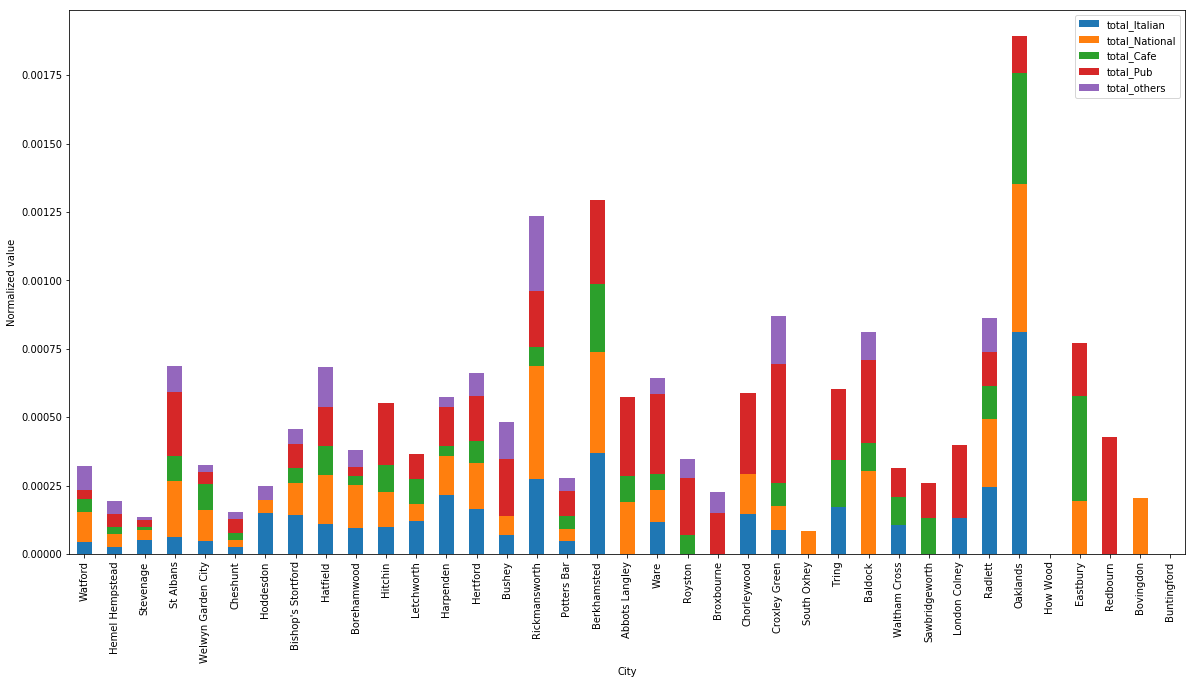

In [42]:
df_summa4.plot(kind='bar', stacked=True, figsize=(20,10))
plt.xlabel('City')
plt.ylabel('Normalized value')
plt.show()

We still see that in both Hemel Hempstead and Cheshnut are not so many other popular food places, so the idea to open a new Italian Restaurant in one of them looks fine

Clustering

In [43]:
# set number of clusters
kclusters = 5

t_grouped_clustering = t_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(t_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 1, 1, 0, 3, 3, 3, 3, 3], dtype=int32)

In [126]:
#for testing
#cities_venues_sorted.drop("Cluster Labels",axis=1,inplace=True)
#cities_venues_sorted
#t_grouped

In [44]:
# add clustering labels

cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

t_merged = df
t_merged.rename(columns={"City": "City"},inplace=True)

# merge grouped with data to add latitude/longitude for each neighborhood
t_merged = t_merged.join(cities_venues_sorted.set_index('City'), on='City')

t_merged.head()# check the last columns!

,City,Population,City long,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Watford,90301,"Watford, Hertfordshire, East of England, England",51.655388,-0.395742,4,Coffee Shop,Platform,Furniture / Home Store,Italian Restaurant,Clothing Store,Theater,Pub,Burger Joint,Stationery Store,Electronics Store
1,Hemel Hempstead,82074,"Hemel Hempstead, Hertfordshire, East of Englan...",51.751178,-0.472528,0,Clothing Store,Coffee Shop,Pub,Indian Restaurant,Fast Food Restaurant,Pizza Place,Hotel,Grocery Store,Sandwich Place,Bookstore
2,Stevenage,80973,"Stevenage, Hertfordshire, East of England, Eng...",51.903510,-0.201337,0,Coffee Shop,Clothing Store,Italian Restaurant,Pizza Place,Gym / Fitness Center,Pub,American Restaurant,Sandwich Place,Movie Theater,Fast Food Restaurant
3,St Albans,64038,"St Albans, Hertfordshire, East of England, Eng...",51.749296,-0.342253,2,Pub,Coffee Shop,Café,Indian Restaurant,Italian Restaurant,Bakery,History Museum,Theater,French Restaurant,Breakfast Spot
4,Welwyn Garden City,43252,"Welwyn Garden City, Hertfordshire, East of Eng...",51.803108,-0.206887,1,Café,Pub,Chinese Restaurant,Clothing Store,Supermarket,Coffee Shop,Department Store,English Restaurant,Other Repair Shop,Sandwich Place


5 Clusters each has similarities in Most Common Venues 

Cluster Nr0

In [45]:
t_merged.loc[t_merged['Cluster Labels'] == 0, t_merged.columns[[0]+[1] + list(range(5, t_merged.shape[1]))]]

,City,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Hemel Hempstead,82074,0,Clothing Store,Coffee Shop,Pub,Indian Restaurant,Fast Food Restaurant,Pizza Place,Hotel,Grocery Store,Sandwich Place,Bookstore
2,Stevenage,80973,0,Coffee Shop,Clothing Store,Italian Restaurant,Pizza Place,Gym / Fitness Center,Pub,American Restaurant,Sandwich Place,Movie Theater,Fast Food Restaurant
9,Borehamwood,31616,0,Coffee Shop,Gym / Fitness Center,Hotel,Film Studio,Grocery Store,Fast Food Restaurant,Bakery,Pizza Place,Supermarket,Indian Restaurant


Cluster N1

In [46]:
t_merged.loc[t_merged['Cluster Labels'] == 1, t_merged.columns[[0]+[1] + list(range(5, t_merged.shape[1]))]]

,City,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Welwyn Garden City,43252,1,Café,Pub,Chinese Restaurant,Clothing Store,Supermarket,Coffee Shop,Department Store,English Restaurant,Other Repair Shop,Sandwich Place
7,Bishop's Stortford,34929,1,Pub,Italian Restaurant,Supermarket,Coffee Shop,Clothing Store,Restaurant,Pizza Place,Bar,French Restaurant,Café
8,Hatfield,27883,1,Pub,Fast Food Restaurant,Indian Restaurant,Grocery Store,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Chinese Restaurant,Coffee Shop
10,Hitchin,30769,1,Pub,Coffee Shop,Bar,Bookstore,Supermarket,Pizza Place,Sandwich Place,Hotel,Café,Japanese Restaurant
11,Letchworth,32746,1,Pub,Italian Restaurant,Café,Platform,Coffee Shop,Indian Restaurant,Eastern European Restaurant,Sandwich Place,Food & Drink Shop,Park
12,Harpenden,27959,1,Italian Restaurant,Pub,Coffee Shop,Bar,Supermarket,Grocery Store,Fish & Chips Shop,Pizza Place,Baby Store,Park
13,Hertford,24180,1,Pub,Sandwich Place,Bar,Hotel,Gym,Italian Restaurant,Train Station,Coffee Shop,Supermarket,Pizza Place
15,Rickmansworth,14571,1,Pub,Italian Restaurant,Coffee Shop,Supermarket,Grocery Store,Thai Restaurant,Indian Restaurant,Post Office,Fast Food Restaurant,Fish & Chips Shop
17,Berkhamsted,16243,1,Pub,Café,Grocery Store,Pizza Place,Italian Restaurant,Coffee Shop,French Restaurant,Brewery,Bookstore,Indian Restaurant
19,Ware,17133,1,Pub,Coffee Shop,Indian Restaurant,Italian Restaurant,Gym / Fitness Center,Canal Lock,River,Breakfast Spot,Steakhouse,Supermarket


Cluster N2

In [47]:
t_merged.loc[t_merged['Cluster Labels'] == 2, t_merged.columns[[0]+[1] + list(range(5, t_merged.shape[1]))]]

,City,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,St Albans,64038,2,Pub,Coffee Shop,Café,Indian Restaurant,Italian Restaurant,Bakery,History Museum,Theater,French Restaurant,Breakfast Spot


Cluster N3

In [48]:
t_merged.loc[t_merged['Cluster Labels'] == 3, t_merged.columns[[0]+[1] + list(range(5, t_merged.shape[1]))]]

,City,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Cheshunt,38726,3,Grocery Store,Pub,Café,Burger Joint,Recreation Center,Breakfast Spot,College Theater,River,Convenience Store,Hostel
6,Hoddesdon,20250,3,Supermarket,Italian Restaurant,Grocery Store,American Restaurant,Gym / Fitness Center,Concert Hall,Coffee Shop,Fast Food Restaurant,Shopping Mall,Pizza Place
14,Bushey,14488,3,Pub,Restaurant,English Restaurant,Grocery Store,Italian Restaurant,Golf Course,Park,Food & Drink Shop,Fish & Chips Shop,Fireworks Store
16,Potters Bar,21639,3,Pub,Coffee Shop,Indian Restaurant,Gym,Fast Food Restaurant,Sandwich Place,General Entertainment,Supermarket,Grocery Store,Pizza Place
18,Abbots Langley,10472,3,Pub,Indian Restaurant,Café,Convenience Store,Chinese Restaurant,Film Studio,French Restaurant,Food Stand,Food & Drink Shop,Fish & Chips Shop
20,Royston,14366,3,Pub,Hotel,Betting Shop,Fast Food Restaurant,Coffee Shop,Café,Malay Restaurant,Soccer Field,Breakfast Spot,Stationery Store
21,Broxbourne,13298,3,Pub,Park,Gas Station,Train Station,Harbor / Marina,Restaurant,Grocery Store,Women's Store,Event Space,Food & Drink Shop
22,Chorleywood,6814,3,Pub,Indian Restaurant,Coffee Shop,Metro Station,Park,Pizza Place,Deli / Bodega,Train Station,BBQ Joint,Athletics & Sports
23,Croxley Green,11520,3,Pub,Indian Restaurant,Café,Pizza Place,Metro Station,Restaurant,Coffee Shop,Grocery Store,Convenience Store,Fast Food Restaurant
24,South Oxhey,11983,3,Grocery Store,Indian Restaurant,Bakery,Gym / Fitness Center,Nature Preserve,Platform,Sporting Goods Shop,Pool,Baby Store,Athletics & Sports


Cluster N4

In [49]:
t_merged.loc[t_merged['Cluster Labels'] == 4, t_merged.columns[[0]+[1] + list(range(5, t_merged.shape[1]))]]

,City,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Watford,90301,4,Coffee Shop,Platform,Furniture / Home Store,Italian Restaurant,Clothing Store,Theater,Pub,Burger Joint,Stationery Store,Electronics Store


From the clustering we see that Hemel Hempstead and Cheshunt, what both hs similarity in the luck of popular Italian/Pizza places, are in different clusters, so do not have a lot of other similarities; the same about Hoddesdon and Bishop's Stortford - they also have similar Italian/Pizza popular places amount and for both of them Italian restaunant is in top 3, but they are in different clusters, so  there are not a lot of more similarieties. From the other side, we see also a contrexample - Berkhamsted and Rickmansworth are in one cluster and also have similar amount of popular Italian/Pizza places. So actually there are no big correlation between general similarity in popular places and similarity in having close relative amount of Italian/Pizza places

Clustering representation on the map

In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(t_merged['Latitude'], t_merged['Longitude'], t_merged['City'], t_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters